In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Función para imputar la media o mediana agrupada por COMP_S_NAME
def impute_grouped_data(df, column, method='mean'):
    if method == 'median':
        return df.groupby('COMP_S_NAME')[column].transform(lambda x: x.fillna(x.median()))
    elif method == 'linear':
        return df[column].interpolate(method='linear')
    else:
        return df.groupby('COMP_S_NAME')[column].transform(lambda x: x.fillna(x.mean()))


In [3]:
# Cargar las bases de datos
produccion_df = pd.read_csv("produccion(1).csv")
test_df = pd.read_csv("TEST21.csv")

<Axes: >

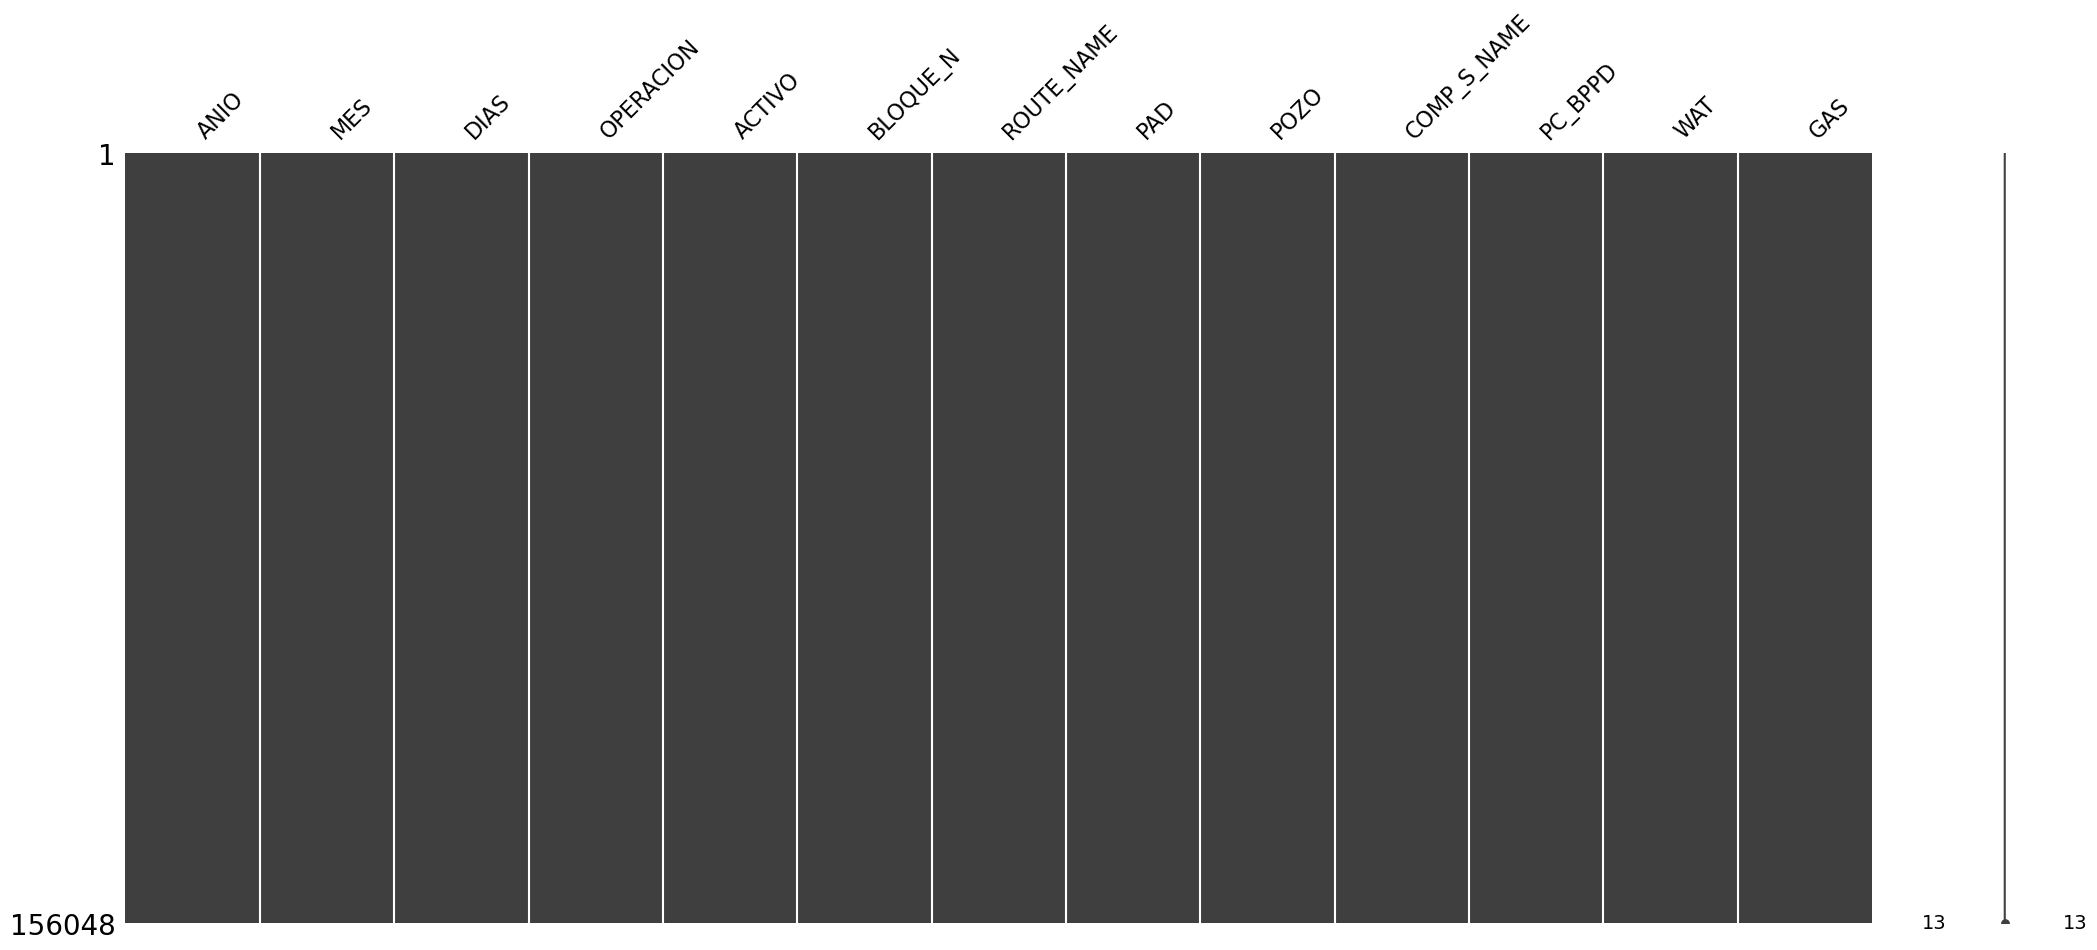

In [4]:
import missingno as msno
msno.matrix(produccion_df)

<Axes: >

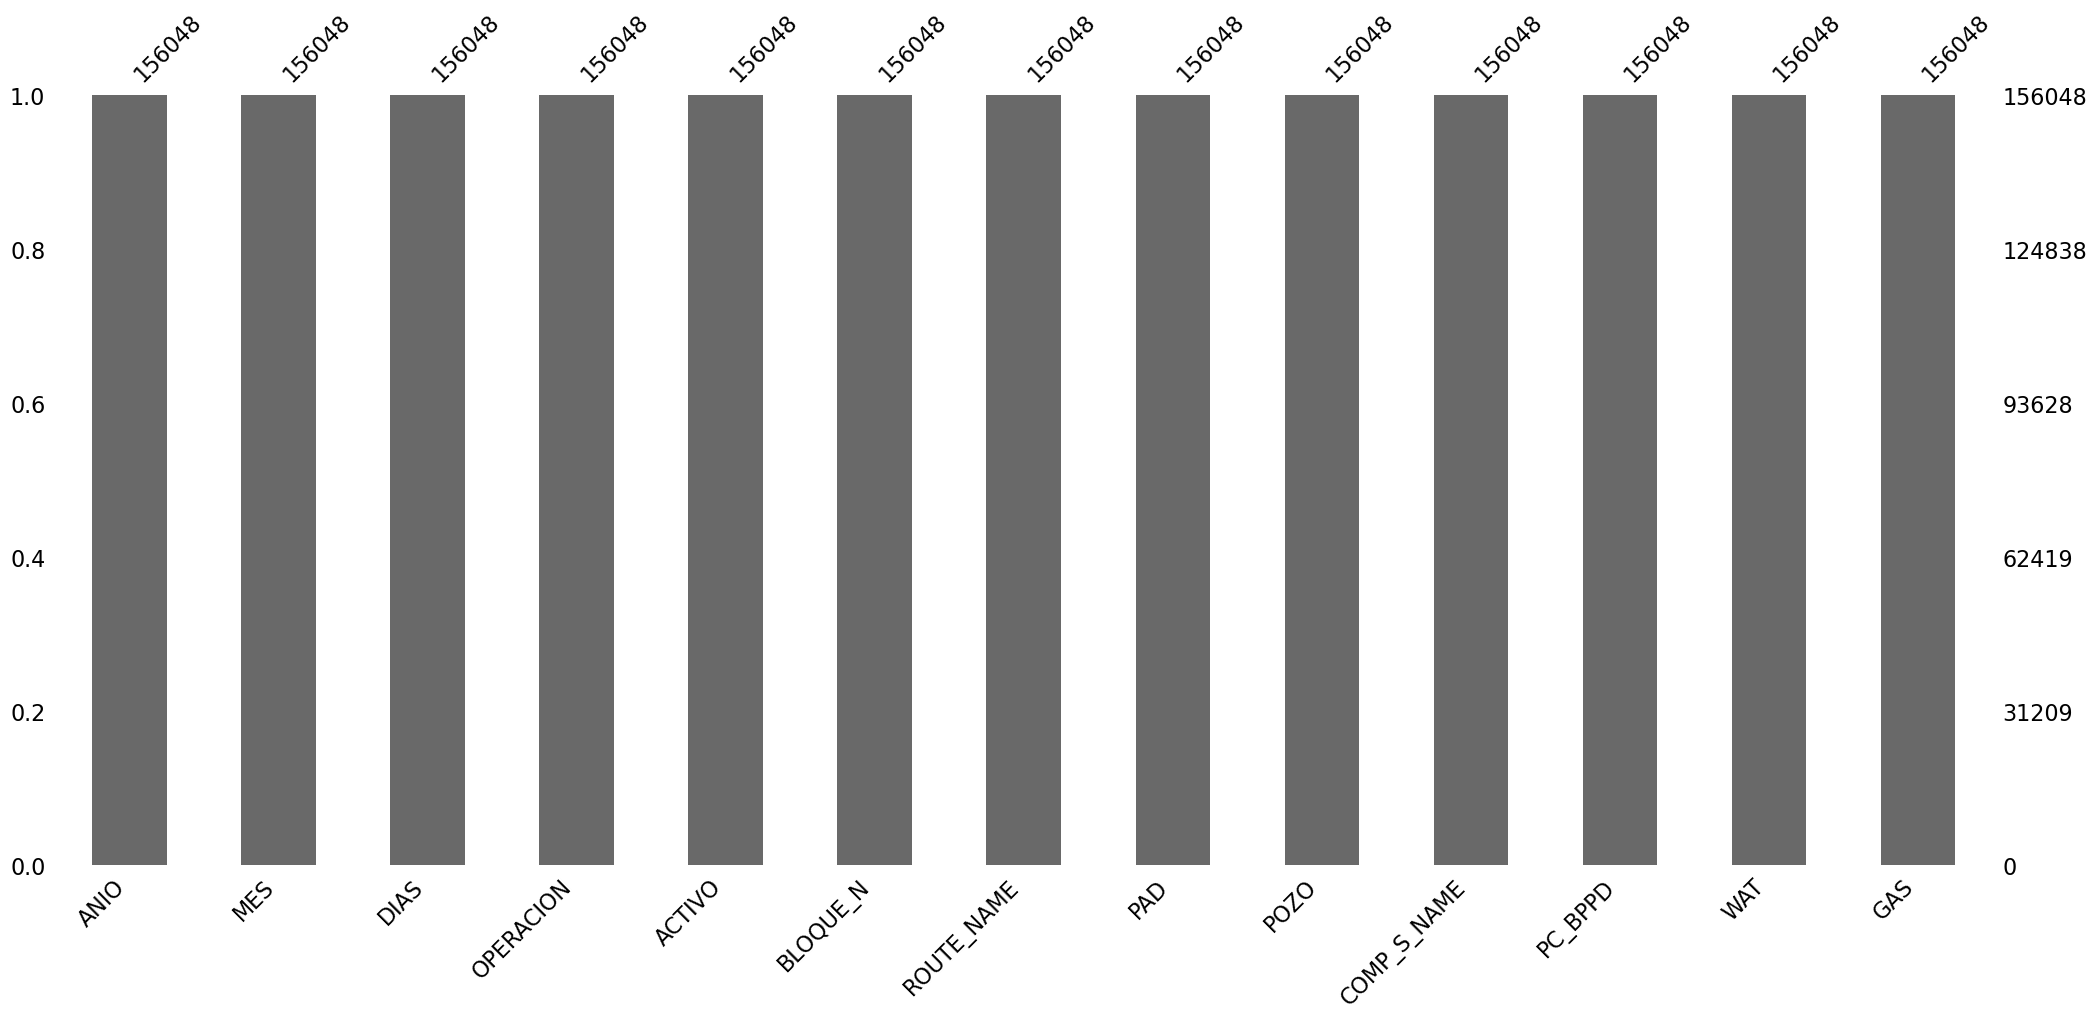

In [5]:
msno.bar(produccion_df)

In [6]:
# Eliminar duplicados
produccion_df = produccion_df.drop_duplicates()
test_df = test_df.drop_duplicates()

In [7]:
# Eliminar columnas innecesarias de la tabla de producción
produccion_df = produccion_df.drop(columns=['OPERACION', 'ACTIVO', 'BLOQUE_N'])

In [8]:
# Eliminar filas con valores faltantes en columnas críticas
critical_columns_produccion = ['ANIO', 'MES', 'DIAS', 'ROUTE_NAME', 'PAD', 'POZO', 'COMP_S_NAME']
critical_columns_test = ['BSW', 'CASING_PRESS', 'PBHP', 'TUBING_PRESS', 'PIP', 'FLAP', 'SBHP', 'TUBING_TMP', 'AMPS_A', 'PUMP_TMP', 'MOTOR_HZ', 'POWER_KW', 'STAGE_COUNT', 'VOLTAGE', 'INTAKE_DEPTH', 'PUMP_TYPE', 'SALINIDAD', 'INJECTION_VOL', 'RETURN_VOL']

produccion_df = produccion_df.dropna(subset=critical_columns_produccion)
test_df = test_df.dropna(subset=critical_columns_test)

In [9]:
# Imputar valores faltantes en columnas seleccionadas con el método recomendado
produccion_df['PC_BPPD'] = impute_grouped_data(produccion_df, 'PC_BPPD', method='median')
produccion_df['WAT'] = impute_grouped_data(produccion_df, 'WAT', method='median')
produccion_df['GAS'] = impute_grouped_data(produccion_df, 'GAS', method='linear')

test_df['GRAV_OIL_API'] = impute_grouped_data(test_df, 'GRAV_OIL_API', method='linear')
test_df['GAS_SP_GRAVITY'] = impute_grouped_data(test_df, 'GAS_SP_GRAVITY', method='linear')

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
# Convertir las columnas de fecha al formato correcto
produccion_df['DIAS'] = pd.to_datetime(produccion_df['DIAS'], format='%d-%b-%y')
test_df['EFF_DT'] = pd.to_datetime(test_df['EFF_DT'], format='%Y-%m-%d')

In [12]:
# Combinar los DataFrames usando 'COMP_S_NAME' y las fechas correspondientes
combined_df = pd.merge(produccion_df, test_df, left_on=['COMP_S_NAME', 'DIAS'], right_on=['COMP_S_NAME', 'EFF_DT'], how='inner')

In [13]:
produccion_df.describe

<bound method NDFrame.describe of         ANIO  MES       DIAS     ROUTE_NAME    PAD        POZO   COMP_S_NAME  \
0       2023    1 2023-01-01  SACHA CENTRAL    PAD     SCH-013     SCH-013BT   
1       2023    1 2023-01-01  SACHA CENTRAL    PAD     SCH-017      SCH-017U   
2       2023    1 2023-01-01  SACHA CENTRAL    PAD     SCH-018     SCH-018UI   
3       2023    1 2023-01-01  SACHA CENTRAL    PAD     SCH-019      SCH-019U   
4       2023    1 2023-01-01  SACHA CENTRAL    PAD     SCH-025      SCH-025U   
...      ...  ...        ...            ...    ...         ...           ...   
156043  2023   12 2023-12-31      SACHA SUR  PAD W    SCHW-198    SCHW-198HS   
156044  2023   12 2023-12-31      SACHA SUR  PAD W    SCHW-257    SCHW-257BT   
156045  2023   12 2023-12-31      SACHA SUR  PAD W    SCHW-258    SCHW-258HS   
156046  2023   12 2023-12-31      SACHA SUR  PAD W    SCHW-267    SCHW-267TI   
156047  2023   12 2023-12-31      SACHA SUR  PAD W  SCHW-268R1  SCHW-268R1UI   

     

In [14]:
# Eliminar filas con valores faltantes en columnas críticas
critical_columns_produccion = ['ANIO', 'MES', 'DIAS', 'ROUTE_NAME', 'PAD', 'POZO', 'COMP_S_NAME']
critical_columns_test = ['BSW', 'CASING_PRESS', 'PBHP', 'TUBING_PRESS', 'PIP', 'FLAP', 'SBHP', 'TUBING_TMP', 'AMPS_A', 'PUMP_TMP', 'MOTOR_HZ', 'POWER_KW', 'STAGE_COUNT', 'VOLTAGE', 'INTAKE_DEPTH', 'PUMP_TYPE', 'SALINIDAD', 'INJECTION_VOL', 'RETURN_VOL']
combined_df.dropna(subset=critical_columns_produccion + critical_columns_test, inplace=True)


In [15]:
# Imputar valores faltantes en otras columnas con el método recomendado
# Asumiendo que la función 'impute_grouped_data' está definida anteriormente en el código
combined_df['PC_BPPD'] = impute_grouped_data(combined_df, 'PC_BPPD', method='median')
combined_df['WAT'] = impute_grouped_data(combined_df, 'WAT', method='median')
combined_df['GAS'] = impute_grouped_data(combined_df, 'GAS', method='linear')
combined_df['GRAV_OIL_API'] = impute_grouped_data(combined_df, 'GRAV_OIL_API', method='linear')
combined_df['GAS_SP_GRAVITY'] = impute_grouped_data(combined_df, 'GAS_SP_GRAVITY', method='linear')


In [16]:
# Extraer características de la columna de fecha 'DIAS'
combined_df['year'] = combined_df['DIAS'].dt.year
combined_df['month'] = combined_df['DIAS'].dt.month
combined_df['day'] = combined_df['DIAS'].dt.day
combined_df['dayofweek'] = combined_df['DIAS'].dt.dayofweek

In [17]:
# Aplicar Label Encoding a las columnas seleccionadas incluyendo 'COMP_S_NAME'
le = LabelEncoder()
columnas_produccion_label = ['ROUTE_NAME', 'PAD', 'POZO', 'COMP_S_NAME']
columnas_test_label = ['PUMP_TYPE']

In [18]:
# Aplicar Label Encoding a cada columna categórica
for columna in columnas_produccion_label + columnas_test_label:
    combined_df[columna] = le.fit_transform(combined_df[columna])

In [19]:
# Eliminar las columnas de fecha originales 'DIAS' y 'EFF_DT'
combined_df.drop(['DIAS', 'EFF_DT'], axis=1, inplace=True)

In [20]:
# Lista de variables predictoras incluyendo las nuevas características de fecha
predictoras = [
    'AMPS_A', 'TUBING_TMP', 'CASING_PRESS', 'PBHP', 'SALINIDAD',
    'GAS_SP_GRAVITY', 'STAGE_COUNT', 'POWER_KW', 'TUBING_PRESS',
    'PUMP_TMP', 'VOLTAGE', 'INTAKE_DEPTH', 'year', 'month', 'day', 'dayofweek', 'POZO', 'COMP_S_NAME','PUMP_TYPE'
]

In [21]:
# Verificar si todas las columnas existen en el DataFrame
for columna in predictoras:
    if columna not in combined_df.columns:
        print(f"La columna {columna} no está en el DataFrame.")

In [22]:
# Definir las características (X) y las variables objetivo (y)
X = combined_df[predictoras]  # Variables predictoras
y = combined_df[['PC_BPPD', 'WAT', 'GAS']]  # Variables objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ahora X_train y y_train contienen los datos para entrenar el modelo
# X_test y y_test se usarán para probar el modelo

Matrix Plot: Este gráfico permite ver rápidamente la presencia y distribución de los datos faltantes en el DataFrame. Las líneas blancas representan los datos faltantes, y es útil para identificar patrones de datos faltantes.


<Axes: >

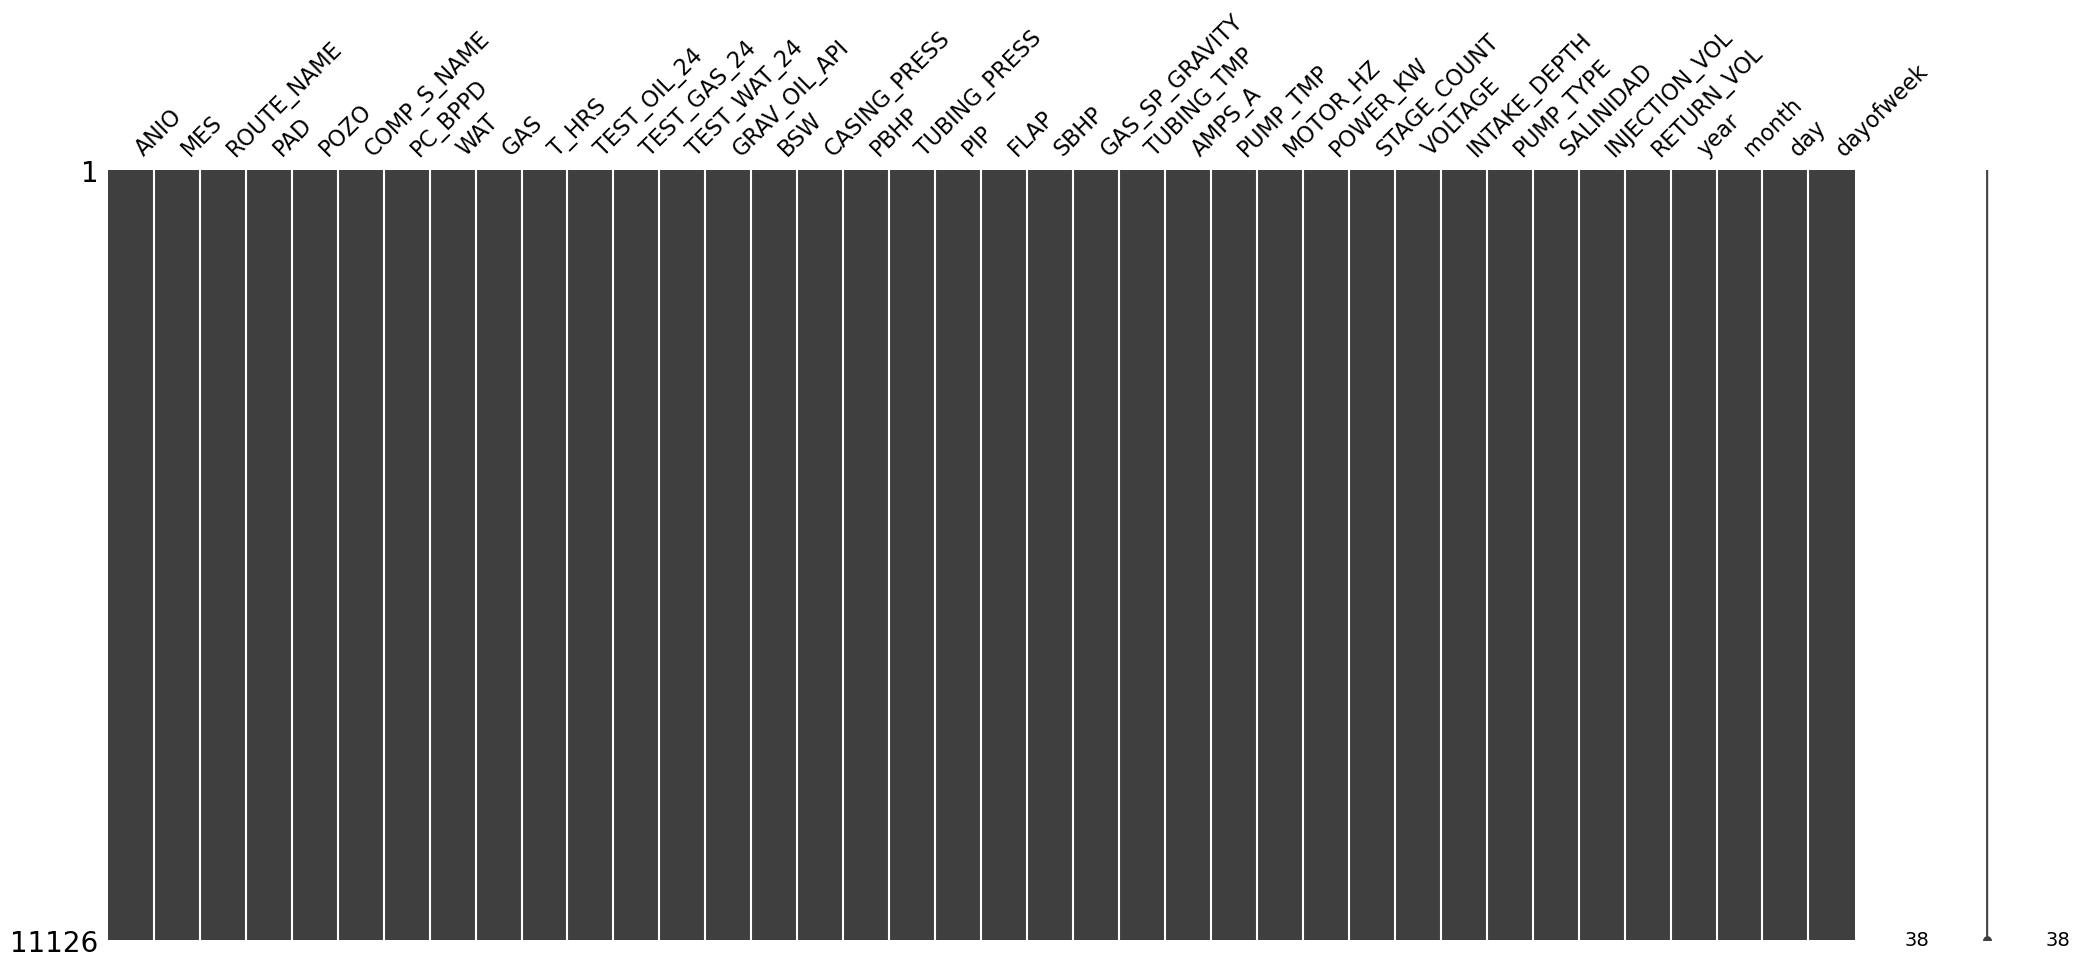

In [23]:
import missingno as msno
msno.matrix(combined_df)

Bar Chart: Muestra la cantidad de valores no faltantes para cada variable y te permite comparar rápidamente la completitud entre diferentes variables.

<Axes: >

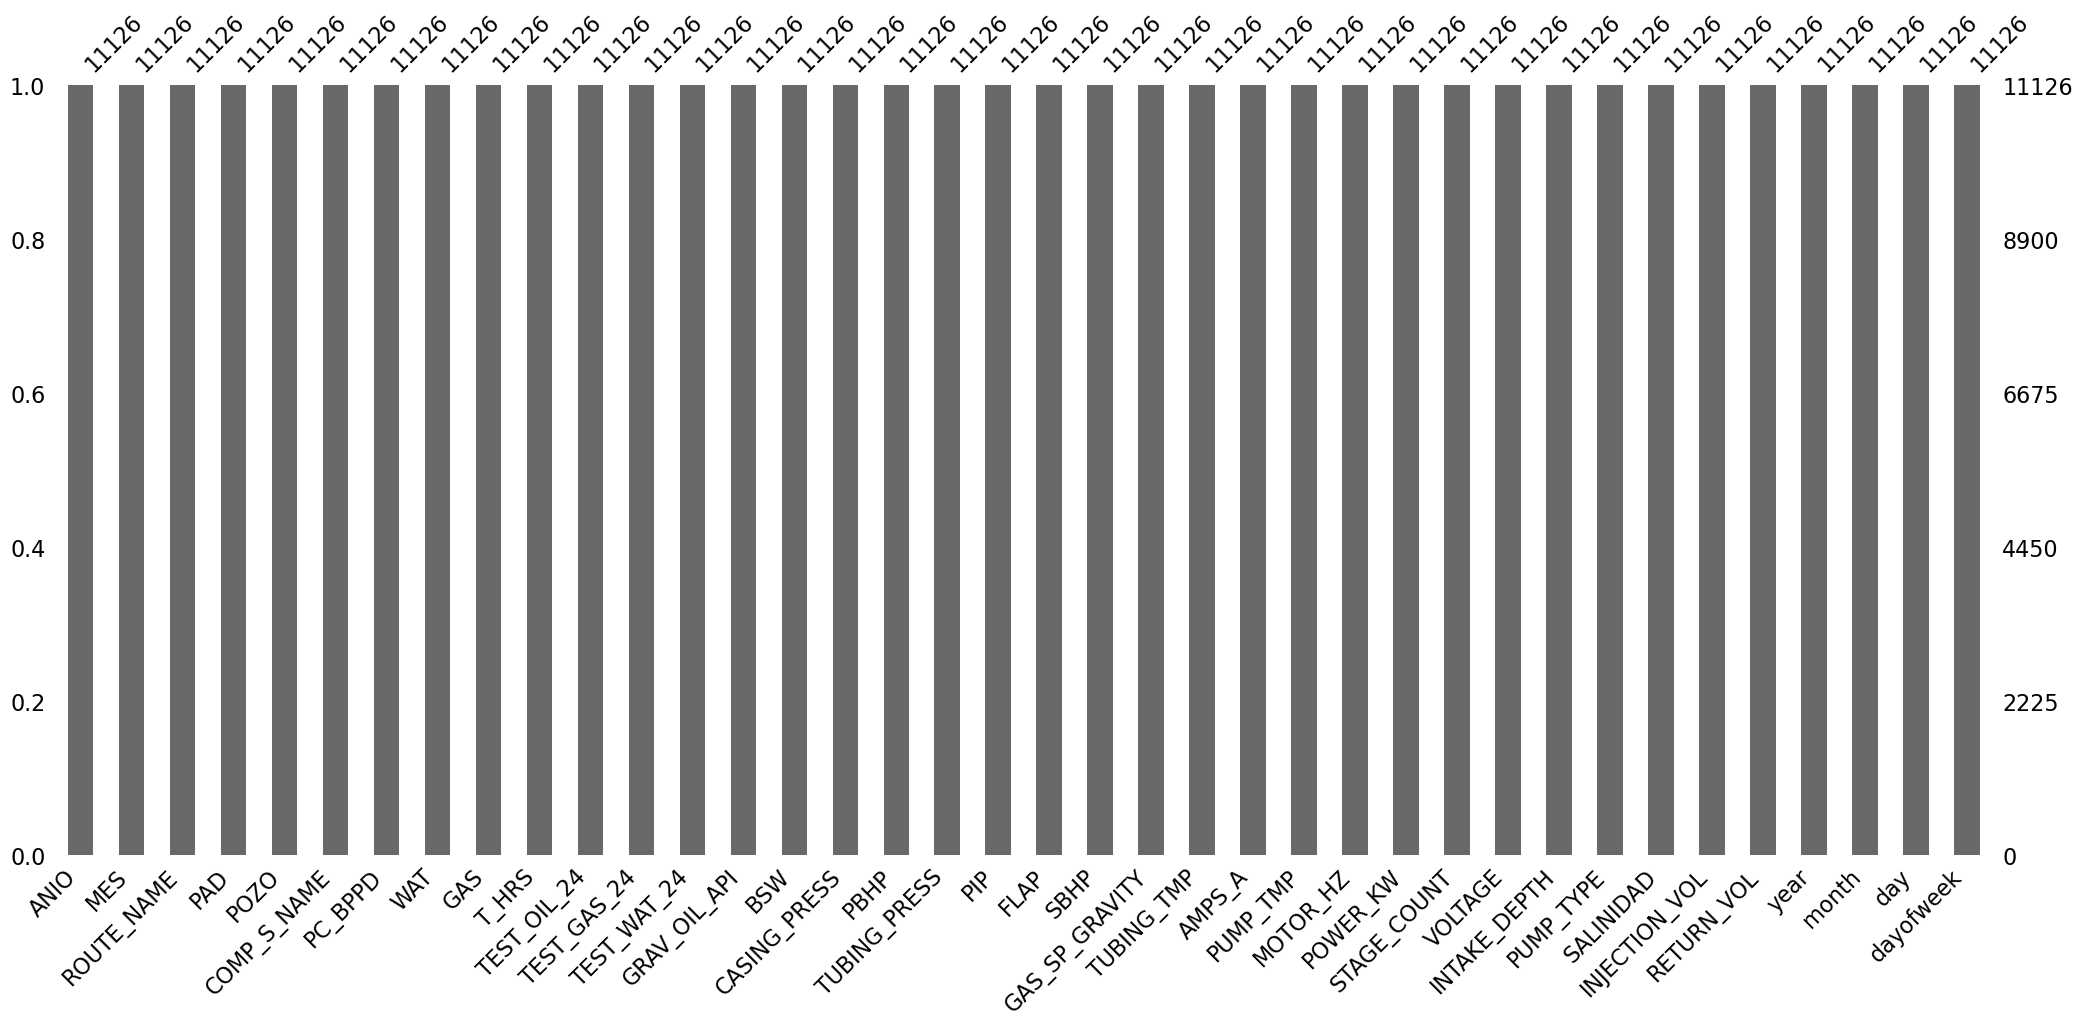

In [24]:
msno.bar(combined_df)

In [25]:
combined_df.isnull().sum()

ANIO              0
MES               0
ROUTE_NAME        0
PAD               0
POZO              0
COMP_S_NAME       0
PC_BPPD           0
WAT               0
GAS               0
T_HRS             0
TEST_OIL_24       0
TEST_GAS_24       0
TEST_WAT_24       0
GRAV_OIL_API      0
BSW               0
CASING_PRESS      0
PBHP              0
TUBING_PRESS      0
PIP               0
FLAP              0
SBHP              0
GAS_SP_GRAVITY    0
TUBING_TMP        0
AMPS_A            0
PUMP_TMP          0
MOTOR_HZ          0
POWER_KW          0
STAGE_COUNT       0
VOLTAGE           0
INTAKE_DEPTH      0
PUMP_TYPE         0
SALINIDAD         0
INJECTION_VOL     0
RETURN_VOL        0
year              0
month             0
day               0
dayofweek         0
dtype: int64

DISEÑO Y DESARROLLO DEL ARBOL

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
# Crear el modelo de árbol de decisiones para regresión
modelo_arbol = DecisionTreeRegressor(random_state=42)

In [28]:
# Entrenar el modelo con los datos de entrenamiento
modelo_arbol.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [29]:
# Predecir los resultados con el conjunto de prueba
y_pred = modelo_arbol.predict(X_test)

In [30]:
# Calcular métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R^2): {r2}')

Error cuadrático medio (MSE): 8313.611642992364
Coeficiente de determinación (R^2): 0.9567480962928899


In [31]:
# Visualizar la importancia de las características
importancias = modelo_arbol.feature_importances_
caracteristicas = predictoras
importancias_df = pd.DataFrame({'caracteristica': caracteristicas, 'importancia': importancias})
print(importancias_df.sort_values(by='importancia', ascending=False))

    caracteristica  importancia
4        SALINIDAD     0.412459
6      STAGE_COUNT     0.156228
16            POZO     0.081833
0           AMPS_A     0.077482
11    INTAKE_DEPTH     0.054965
18       PUMP_TYPE     0.045989
17     COMP_S_NAME     0.042795
8     TUBING_PRESS     0.023870
10         VOLTAGE     0.023806
3             PBHP     0.014440
5   GAS_SP_GRAVITY     0.013779
9         PUMP_TMP     0.011730
2     CASING_PRESS     0.011671
7         POWER_KW     0.009342
13           month     0.005288
15       dayofweek     0.005188
1       TUBING_TMP     0.005109
14             day     0.004027
12            year     0.000000


In [32]:
y_train

,PC_BPPD,WAT,GAS
4001,136.770,1803.0,1.09
10604,119.340,474.0,18.29
6606,280.465,131.0,56.23
7889,232.410,1047.0,34.50
5391,262.080,3023.0,40.77
...,...,...,...
5734,229.328,1037.0,34.20
5191,199.781,4.0,30.05
5390,434.474,4.0,88.51
860,198.105,251.0,42.00


In [33]:
y_pred

array([[ 134.237,  237.   ,   20.65 ],
       [  77.709,   84.   ,   15.63 ],
       [1084.474,   94.   ,  869.6  ],
       ...,
       [ 190.451,  293.25 ,   39.685],
       [ 197.601,  250.   ,   30.54 ],
       [ 341.439,   58.   ,   68.4  ]])

In [34]:
pd.DataFrame(y_pred).describe()

,0,1,2
count,2226.000000,2226.000000,2226.000000
mean,270.223747,327.089368,82.650575
std,235.748084,610.392881,121.232692
min,0.000000,0.000000,0.000000
25%,121.448250,19.000000,23.402500
50%,202.629000,77.000000,44.210000
75%,312.715000,323.000000,82.372500
max,1567.400000,4198.000000,869.600000


In [35]:
# Si es necesario, ajustar parámetros del modelo y volver a entrenar
# Por ejemplo, limitar la profundidad del árbol para evitar sobreajuste
modelo_arbol_ajustado = DecisionTreeRegressor(max_depth=5, random_state=42)
modelo_arbol_ajustado.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [36]:
# Predecir y evaluar nuevamente
y_pred_ajustado = modelo_arbol_ajustado.predict(X_test)
mse_ajustado = mean_squared_error(y_test, y_pred_ajustado)
r2_ajustado = r2_score(y_test, y_pred_ajustado)

print(f'Error cuadrático medio ajustado (MSE): {mse_ajustado}')
print(f'Coeficiente de determinación ajustado (R^2): {r2_ajustado}')

Error cuadrático medio ajustado (MSE): 41238.43979337102
Coeficiente de determinación ajustado (R^2): 0.43094221706665553


1.- DecisionTreeRegressor implementa un modelo de regresión basado en árboles de decisión

2.-mean_squared_error Es una métrica común para evaluar la calidad de un modelo de regresión.

Error Cuadrático Medio (MSE): Elresultado del MSE podría deberse a cambios en la escala de los datos después de eliminar la normalización. Los valores reales podrían tener un rango mucho más amplio, lo que aumenta el error cuadrático medio.

Coeficiente de Determinación (R^2): Un R^2 de aproximadamente 0.946 es muy alto, lo que sugiere que el modelo puede explicar alrededor del 94.6% de la variabilidad en los datos objetivo. Esto es indicativo de un buen ajuste del modelo a los datos.

Importancia de las Características: La variable ‘SALINIDAD’ tiene la mayor importancia en el modelo, seguida por ‘STAGE_COUNT’ y ‘AMPS_A’. Esto significa que estas características son las que más influyen en las predicciones del modelo. Las variables relacionadas con la fecha (‘year’, ‘month’, ‘day’, ‘dayofweek’) tienen una importancia relativamente baja, con ‘year’ no contribuyendo en absoluto y tiene lógica ya que solo tengo datos de un año.

Modelo Ajustado: Después de ajustar el modelo limitando la profundidad del árbol, el MSE aumentó disminuyó un poco y el R^2 disminuyó a aproximadamente 0.37. Esto indica que el modelo ajustado no se desempeña tan bien como el modelo original. El ajuste puede haber sido demasiado restrictivo, lo que llevó a un modelo que no captura suficientemente la complejidad de los datos.


Ajuste de Hiperparámetros: Utilizo GridSearchCV para encontrar los mejores hiperparámetros.


In [37]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a ajustar
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}


In [38]:
# Inicializar el modelo
modelo_arbol = DecisionTreeRegressor(random_state=42)

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=modelo_arbol, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Entrenar GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

# Crear un nuevo modelo con los mejores hiperparámetros
modelo_arbol_mejorado = DecisionTreeRegressor(**best_params, random_state=42)

# Entrenar el modelo mejorado
modelo_arbol_mejorado.fit(X_train, y_train)

# Predecir los resultados con el conjunto de prueba
y_pred_mejorado = modelo_arbol_mejorado.predict(X_test)

# Calcular métricas de rendimiento
mse_mejorado = mean_squared_error(y_test, y_pred_mejorado)
r2_mejorado = r2_score(y_test, y_pred_mejorado)

print(f'Error cuadrático medio (MSE) mejorado: {mse_mejorado}')
print(f'Coeficiente de determinación (R^2) mejorado: {r2_mejorado}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Error cuadrático medio (MSE) mejorado: 11708.440546412463
Coeficiente de determinación (R^2) mejorado: 0.8010591152137793


Validación Cruzada: Utilizo validación cruzada para una evaluación más robusta del modelo.

In [39]:
from sklearn.model_selection import cross_val_score

# Calcular el puntaje de validación cruzada
cv_scores = cross_val_score(modelo_arbol_mejorado, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_cv_mean = -cv_scores.mean()

print(f'MSE promedio de validación cruzada: {mse_cv_mean}')

MSE promedio de validación cruzada: 14804.753664422848


Técnicas de Ensamble (Gradient Boosting): Utilizo GradientBoostingRegressor de Scikit-learn para mejorar la precisión del modelo.

In [40]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Inicializar el modelo de Gradient Boosting
modelo_gradient_boosting = GradientBoostingRegressor(random_state=42)

# Inicializar el modelo multioutput
modelo_multioutput = MultiOutputRegressor(modelo_gradient_boosting)

# Entrenar el modelo multioutput
modelo_multioutput.fit(X_train, y_train)

# Predecir los resultados con el conjunto de prueba
y_pred_multioutput = modelo_multioutput.predict(X_test)

# Calcular métricas de rendimiento
mse_multioutput = mean_squared_error(y_test, y_pred_multioutput)
r2_multioutput = r2_score(y_test, y_pred_multioutput)

print(f'Error cuadrático medio (MSE) con Gradient Boosting (multioutput): {mse_multioutput}')
print(f'Coeficiente de determinación (R^2) con Gradient Boosting (multioutput): {r2_multioutput}')

Error cuadrático medio (MSE) con Gradient Boosting (multioutput): 16929.98931361242
Coeficiente de determinación (R^2) con Gradient Boosting (multioutput): 0.8248872701661375


Examinar Residuos: Examino los residuos del modelo para identificar patrones y áreas de mejora.


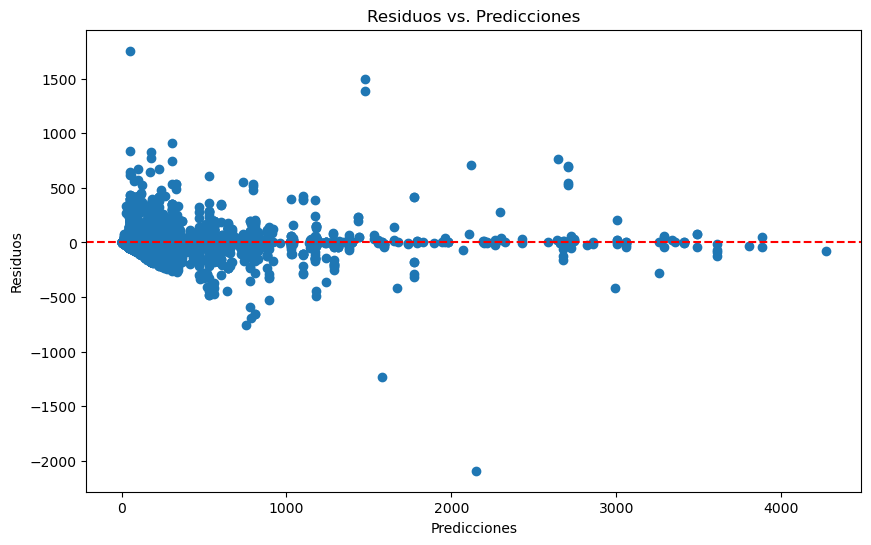

In [41]:
# Calcular los residuos
residuos = y_test - y_pred_mejorado

# Visualizar los residuos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_mejorado, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Residuos vs. Predicciones')
plt.show()

Modelos de Ensamble: Con Random Forest y XGBOOST

In [42]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor


modelo_random_forest = RandomForestRegressor(random_state=42)
modelo_random_forest.fit(X_train, y_train)
y_pred_rf = modelo_random_forest.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest R^2: {r2_rf}')



Random Forest MSE: 3756.0998102567064
Random Forest R^2: 0.9749355683563993


In [43]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [44]:
# XGBoost
from xgboost import XGBRegressor

modelo_xgboost = XGBRegressor(random_state=42)
modelo_xgboost.fit(X_train, y_train)
y_pred_xgb = modelo_xgboost.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost MSE: {mse_xgb}')
print(f'XGBoost R^2: {r2_xgb}')

XGBoost MSE: 3908.4390598084733
XGBoost R^2: 0.9725298684269741


LIME para Interpretación del Modelo:

In [45]:
pip install lime

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [46]:
import lime.lime_tabular

# Asegúrate de que 'modelo_random_forest' está definido y entrenado

# Crear el objeto explainer de LIME para datos tabulares
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,  # Convertir X_train a un array de NumPy
    feature_names=predictoras,
    class_names=['Clase 1', 'Clase 2'],  # o los nombres de las clases que tengas
    mode='regression'  # Usa 'classification' si es un problema de clasificación
)

# Seleccionar una instancia para explicar
i = 10  # Indice de la instancia en X_test que quieres explicar

# Asegúrate de convertir la instancia a un array 1D
instancia_para_explicar = X_test.iloc[i].values

# Pasar la instancia al método explain_instance
exp = explainer.explain_instance(
    data_row=instancia_para_explicar, 
    predict_fn=modelo_random_forest.predict
)

# Mostrar la explicación en consola
exp.show_in_notebook(show_table=True, show_all=False)



C:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


LIME muestra la influencia de diferentes características en la predicción del modelo. 

Valores Predichos: El rango de valores predichos va desde un mínimo de 0.03 hasta un máximo de 0.7. Esto indica la variabilidad en las predicciones del modelo para la instancia específica analizada.

Influencia de Características:

Positiva (Naranja): Las barras naranjas representan características que aumentan la predicción. Por ejemplo, “TUBING PRESS” con un valor de 0.77 tiene una influencia positiva significativa en la predicción.

Negativa (Azul): Las barras azules indican características que disminuyen la predicción. Si una característica tiene una barra azul larga, significa que está reduciendo el valor predicho.



In [47]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

mae = mean_absolute_error(y_test, y_pred_rf)
mape = mean_absolute_percentage_error(y_test, y_pred_rf)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

Mean Absolute Error (MAE): 15.04718755615454
Mean Absolute Percentage Error (MAPE): 1237887043711537.5


Ajuste fino de los hiperparámetros del modelo de Random Forest

In [48]:
from sklearn.model_selection import GridSearchCV

# Definir el rango de hiperparámetros a probar
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],  # Máxima profundidad de los árboles
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras requeridas en un nodo hoja
    'bootstrap': [True, False]  # Método de muestreo de las muestras para entrenar cada árbol
}


In [49]:
# Inicializar el modelo Random Forest
rf = RandomForestRegressor(random_state=42)

# Inicializar GridSearchCV con el modelo y el rango de hiperparámetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

In [50]:
# Ajustar GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Ver los mejores hiperparámetros encontrados
print(f'Mejores hiperparámetros: {grid_search.best_params_}')

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Mejores hiperparámetros: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [51]:
# Crear un nuevo modelo con los mejores hiperparámetros
best_rf = grid_search.best_estimator_

# Evaluar el nuevo modelo con los datos de prueba
y_pred_best_rf = best_rf.predict(X_test)
best_mse_rf = mean_squared_error(y_test, y_pred_best_rf)
best_r2_rf = r2_score(y_test, y_pred_best_rf)

print(f'Mejor Random Forest MSE: {best_mse_rf}')
print(f'Mejor Random Forest R^2: {best_r2_rf}')

Mejor Random Forest MSE: 3612.2777636180003
Mejor Random Forest R^2: 0.97377106071262


In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Mejores hiperparámetros encontrados por GridSearchCV
mejores_hiperparametros = {
    'bootstrap': True,
    'max_depth': None,
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'n_estimators': 300     
}

In [53]:
# Inicializar el modelo Random Forest con los mejores hiperparámetros
mejor_rf = RandomForestRegressor(
    n_estimators=mejores_hiperparametros['n_estimators'],
    max_depth=mejores_hiperparametros['max_depth'],
    min_samples_split=mejores_hiperparametros['min_samples_split'],
    min_samples_leaf=mejores_hiperparametros['min_samples_leaf'],
    bootstrap=mejores_hiperparametros['bootstrap'],
    random_state=42
)

# Entrenar el modelo con los datos de entrenamiento
mejor_rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=5, n_estimators=300, random_state=42)

In [54]:
# Evaluar el modelo con los datos de prueba
y_pred_mejor_rf = mejor_rf.predict(X_test)
mse_mejor_rf = mean_squared_error(y_test, y_pred_mejor_rf)
r2_mejor_rf = r2_score(y_test, y_pred_mejor_rf)

print(f'Mejor Random Forest MSE: {mse_mejor_rf}')
print(f'Mejor Random Forest R^2: {r2_mejor_rf}')

Mejor Random Forest MSE: 3612.2777636180003
Mejor Random Forest R^2: 0.97377106071262


In [55]:
import seaborn as sns

# Asumiendo que 'y_test' y 'y_pred_mejor_rf' son DataFrames de pandas
# y que 'nombres_variables' es una lista con los nombres de las variables objetivo

nombres_variables = ['PC_BPPD', 'WAT', 'GAS']  # Ejemplo de nombres de variables

# Convertir 'y_test' y 'y_pred_mejor_rf' a arrays de NumPy si aún no lo son
y_test_np = y_test.to_numpy() if isinstance(y_test, pd.DataFrame) else y_test
y_pred_mejor_rf_np = y_pred_mejor_rf.to_numpy() if isinstance(y_pred_mejor_rf, pd.DataFrame) else y_pred_mejor_rf


In [56]:
# Definir una paleta de colores para los gráficos
colores_reales = ['blue', 'green', 'red']  # Colores para los valores reales
colores_predicciones = ['skyblue', 'lightgreen', 'salmon']  # Colores para las predicciones


C:\Users\perezgab\AppData\Local\Temp\ipykernel_4880\2626036367.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test_np[:, i], label=f'Valores Reales - {nombre}', shade=True, color=colores_reales[i])
C:\Users\perezgab\AppData\Local\Temp\ipykernel_4880\2626036367.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_mejor_rf_np[:, i], label=f'Predicciones - {nombre}', shade=True, color=colores_predicciones[i])
C:\Users\perezgab\AppData\Local\Temp\ipykernel_4880\2626036367.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test_np[:, i], label=f'Valores Reales - {nombre}', shade=True, color=colores_reales[i

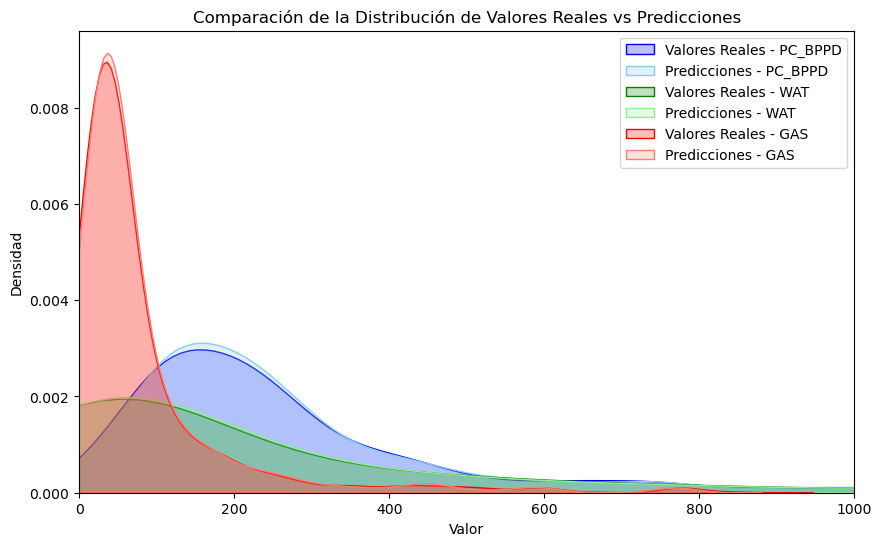

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un único gráfico KDE para todas las variables objetivo
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico

cut = 0

for i, nombre in enumerate(nombres_variables):
    sns.kdeplot(y_test_np[:, i], label=f'Valores Reales - {nombre}', shade=True, color=colores_reales[i])
    sns.kdeplot(y_pred_mejor_rf_np[:, i], label=f'Predicciones - {nombre}', shade=True, color=colores_predicciones[i])

plt.title('Comparación de la Distribución de Valores Reales vs Predicciones')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.xlim(0, 1000)  # Corregido el error tipográfico aquí
plt.legend()
plt.show()


In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [59]:
import numpy as np  

# Realizar la validación cruzada
scores = cross_val_score(mejor_rf, X, y, cv=5, scoring='neg_mean_squared_error')

# Calcular el MSE promedio de la validación cruzada
mse_cv = -np.mean(scores)

# Imprimir el MSE promedio de la validación cruzada
print(f'MSE promedio de la validación cruzada: {mse_cv}')

MSE promedio de la validación cruzada: 8657.579584694318


Importancia de las Características:

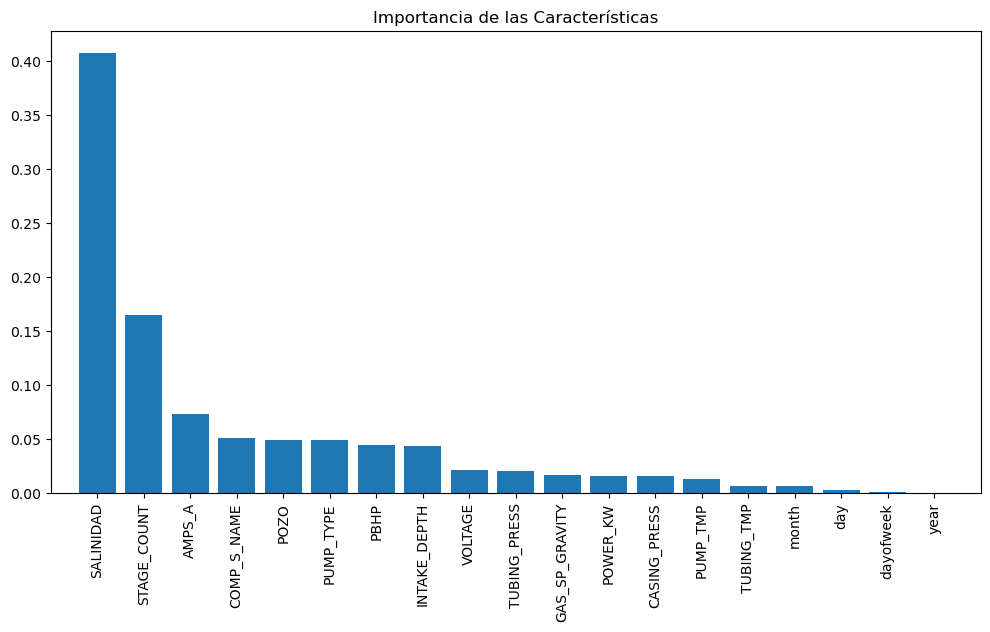

In [60]:

# Entrenar el modelo para obtener la importancia de las características
mejor_rf.fit(X_train, y_train)

# Obtener la importancia de las características
importancias = mejor_rf.feature_importances_

# Ordenar las importancias de las características
indices = np.argsort(importancias)[::-1]

# Graficar la importancia de las características
plt.figure(figsize=(12, 6))
plt.title("Importancia de las Características")
plt.bar(range(X_train.shape[1]), importancias[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(predictoras)[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Uso de LIME para Interpretación del Modelo:

In [61]:
# Asegúrate de que el fondo de las figuras sea blanco
plt.style.use('default')

# Crear el objeto explainer de LIME para datos tabulares
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=predictoras,
    mode='regression'
)

# Seleccionar una instancia para explicar
i = 10  # Indice de la instancia en X_test que quieres explicar
exp = explainer.explain_instance(X_test[i], mejor_rf.predict)

# Mostrar la explicación con fondo blanco
exp.show_in_notebook(show_table=True, show_all=True)


KeyError: 10

In [62]:
# Calcular MAE y MAPE
mae = mean_absolute_error(y_test, y_pred_mejor_rf)
mape = mean_absolute_percentage_error(y_test, y_pred_mejor_rf)

# Imprimir MAE y MAPE
print(f"MAE: {mae}")
print(f"MAPE: {mape}")

MAE: 15.490267384963504
MAPE: 1241484835954898.2


Evaluación del Modelo de Regresión:

In [63]:
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

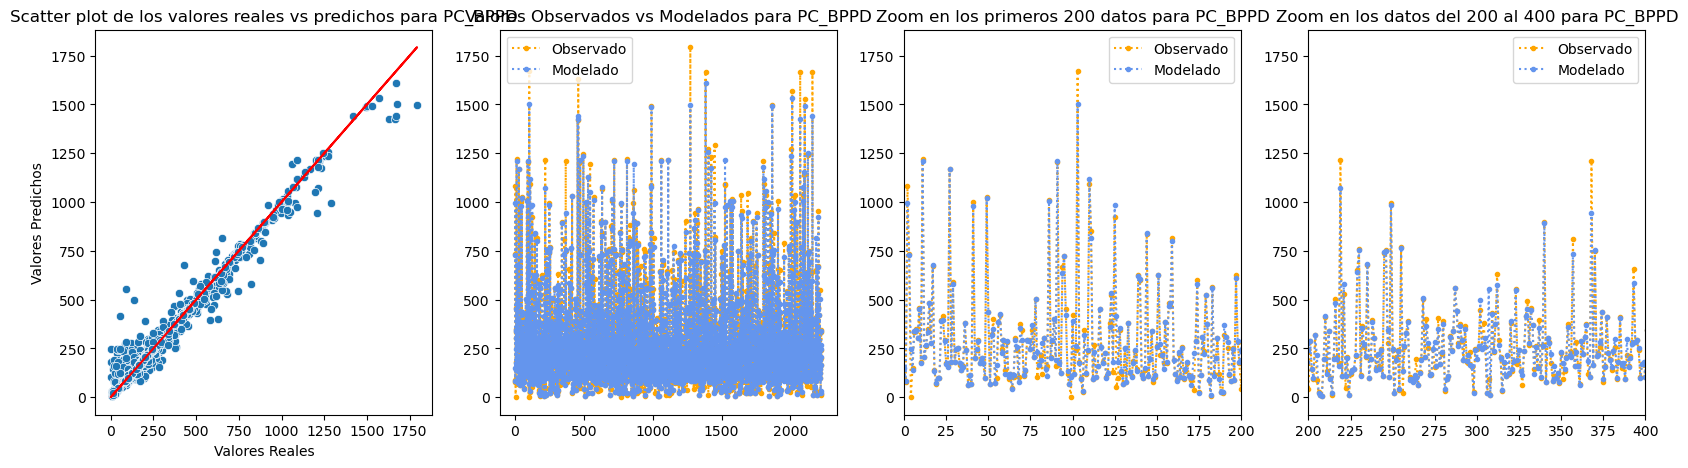

PC_BPPD:
MSE: 1445.1357877885428
RMSE: 38.014941638631285
MAE: 15.791428269685928
MAPE: 1081023476922876.4
R2: 0.9745250455163146


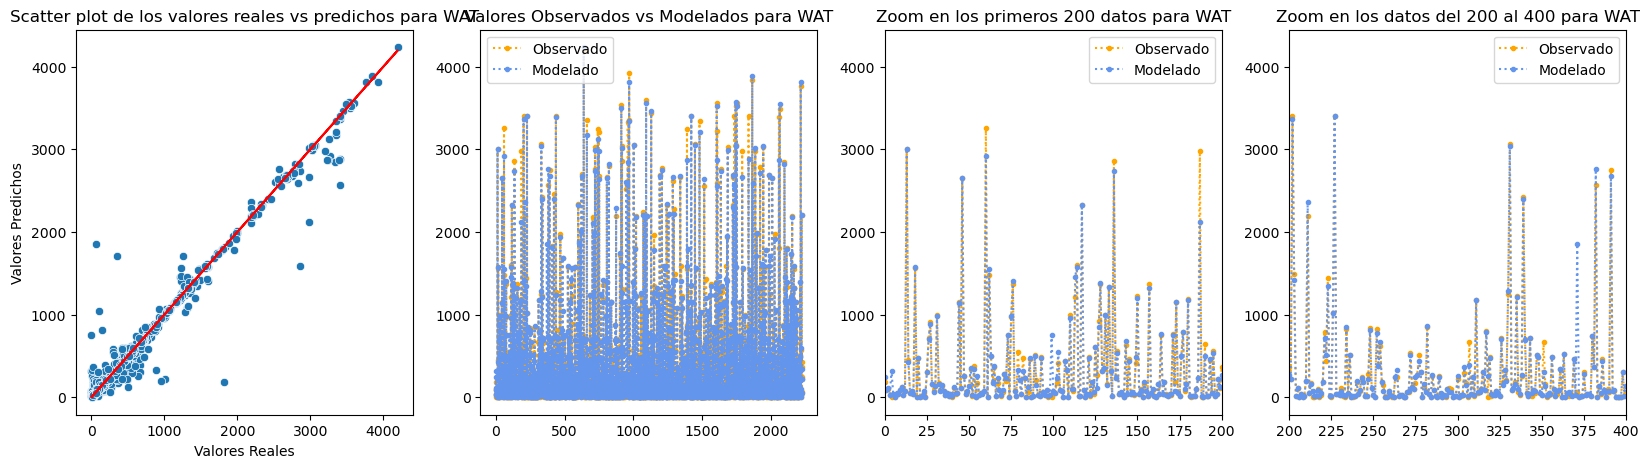

WAT:
MSE: 8954.137446136368
RMSE: 94.62630419780945
MAE: 24.096329363066634
MAPE: 2303337120927295.0
R2: 0.9767784070877351


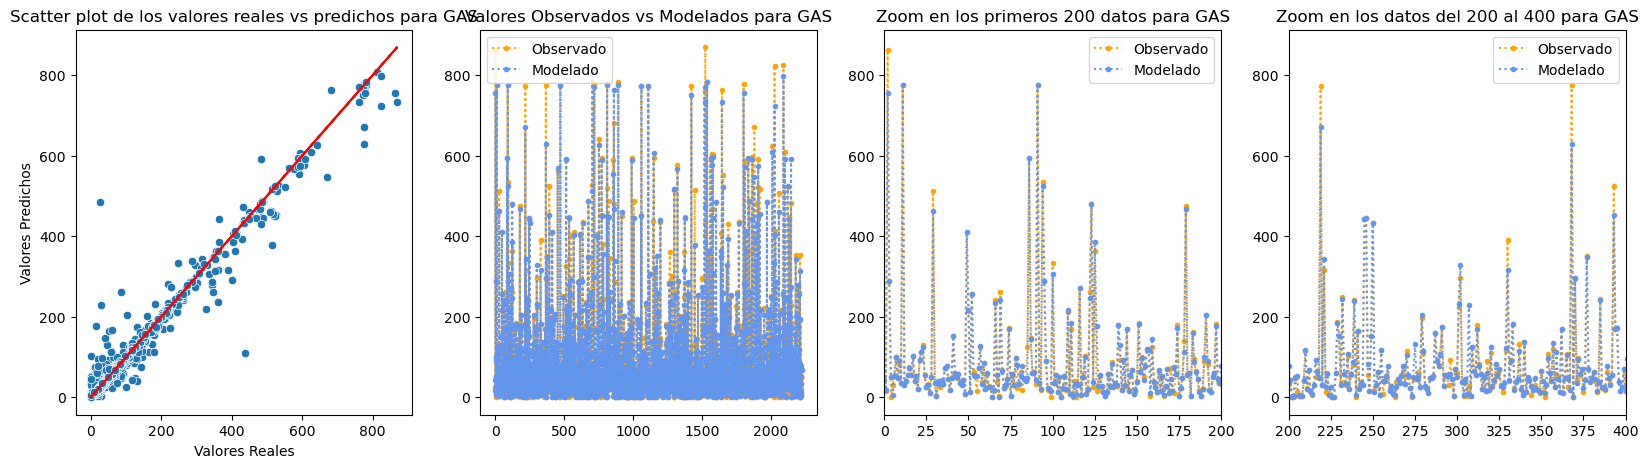

GAS:
MSE: 437.56005692908536
RMSE: 20.91793624928342
MAE: 6.58304452213804
MAPE: 340093910014524.06
R2: 0.9700097295338103


In [64]:
def plot_evaluation(y, y_pred, nombres_variables):
    # Asegurarse de que y y y_pred son arrays de NumPy
    y = np.array(y)
    y_pred = np.array(y_pred)

    # Iterar sobre cada variable objetivo
    for i, nombre in enumerate(nombres_variables):
        fig, axs = plt.subplots(1, 4, figsize=(20, 5))
        axs[0].set_title(f'Scatter plot de los valores reales vs predichos para {nombre}')
        sns.scatterplot(x=y[:, i], y=y_pred[:, i], ax=axs[0])
        axs[0].plot(y[:, i], y[:, i], 'r')  # Línea y = x para referencia
        axs[0].set_xlabel('Valores Reales')
        axs[0].set_ylabel('Valores Predichos')

        axs[1].set_title(f'Valores Observados vs Modelados para {nombre}')
        axs[1].plot(y[:, i], '.:', c="orange", label="Observado")
        axs[1].plot(y_pred[:, i], '.:', c="cornflowerblue", label="Modelado")
        axs[1].legend()

        axs[2].set_title(f'Zoom en los primeros 200 datos para {nombre}')
        axs[2].plot(y[:, i], '.:', c="orange", label="Observado")
        axs[2].plot(y_pred[:, i], '.:', c="cornflowerblue", label="Modelado")
        axs[2].set_xlim(0, 200)
        axs[2].legend()

        axs[3].set_title(f'Zoom en los datos del 200 al 400 para {nombre}')
        axs[3].plot(y[:, i], '.:', c="orange", label="Observado")
        axs[3].plot(y_pred[:, i], '.:', c="cornflowerblue", label="Modelado")
        axs[3].set_xlim(200, 400)
        axs[3].legend()

        plt.show()

        # Imprimir métricas de evaluación para cada variable objetivo
        print(f"{nombre}:")
        print("MSE:", mean_squared_error(y[:, i], y_pred[:, i]))
        print("RMSE:", np.sqrt(mean_squared_error(y[:, i], y_pred[:, i])))
        print("MAE:", mean_absolute_error(y[:, i], y_pred[:, i]))
        print("MAPE:", mean_absolute_percentage_error(y[:, i], y_pred[:, i]))
        print("R2:", r2_score(y[:, i], y_pred[:, i]))

# Nombres de las variables objetivo
nombres_variables = ['PC_BPPD', 'WAT', 'GAS']

# Llamar a la función con los valores reales y predichos, y los nombres de las variables
plot_evaluation(y_test, y_pred_mejor_rf, nombres_variables)

Regresión Lineal

In [65]:
from sklearn.linear_model import LinearRegression

# Inicializar el modelo de Regresión Lineal
modelo_rl = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo_rl.fit(X_train, y_train)

# Evaluar el modelo con los datos de prueba
y_pred_rl = modelo_rl.predict(X_test)
mse_rl = mean_squared_error(y_test, y_pred_rl)
r2_rl = r2_score(y_test, y_pred_rl)

print(f'Regresión Lineal MSE: {mse_rl}')
print(f'Regresión Lineal R^2: {r2_rl}')

Regresión Lineal MSE: 112800.95151667522
Regresión Lineal R^2: 0.18514104738654144


Regresión Ridge:

In [66]:
from sklearn.linear_model import Ridge

# Inicializar el modelo de Regresión Ridge
modelo_ridge = Ridge(alpha=1.0)

# Entrenar el modelo con los datos de entrenamiento
modelo_ridge.fit(X_train, y_train)

# Evaluar el modelo con los datos de prueba
y_pred_ridge = modelo_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Regresión Ridge MSE: {mse_ridge}')
print(f'Regresión Ridge R^2: {r2_ridge}')

Regresión Ridge MSE: 112800.97314749313
Regresión Ridge R^2: 0.18513967518057717


Regresión Lasso: 

In [67]:
from sklearn.linear_model import Lasso

# Inicializar el modelo de Regresión Lasso
modelo_lasso = Lasso(alpha=0.1)

# Entrenar el modelo con los datos de entrenamiento
modelo_lasso.fit(X_train, y_train)

# Evaluar el modelo con los datos de prueba
y_pred_lasso = modelo_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Regresión Lasso MSE: {mse_lasso}')
print(f'Regresión Lasso R^2: {r2_lasso}')

Regresión Lasso MSE: 113508.72947363452
Regresión Lasso R^2: 0.17011602564606298


C:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.063e+08, tolerance: 4.888e+04
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.180e+09, tolerance: 3.407e+05
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.380e+07, tolerance: 1.228e+04
  model = cd_fast.enet_coo

In [68]:
import seaborn as sns
from sklearn.metrics import r2_score

C:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.216e+08, tolerance: 5.242e+04
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.193e+09, tolerance: 3.469e+05
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.742e+07, tolerance: 1.325e+04
  model = cd_fast.enet_coo

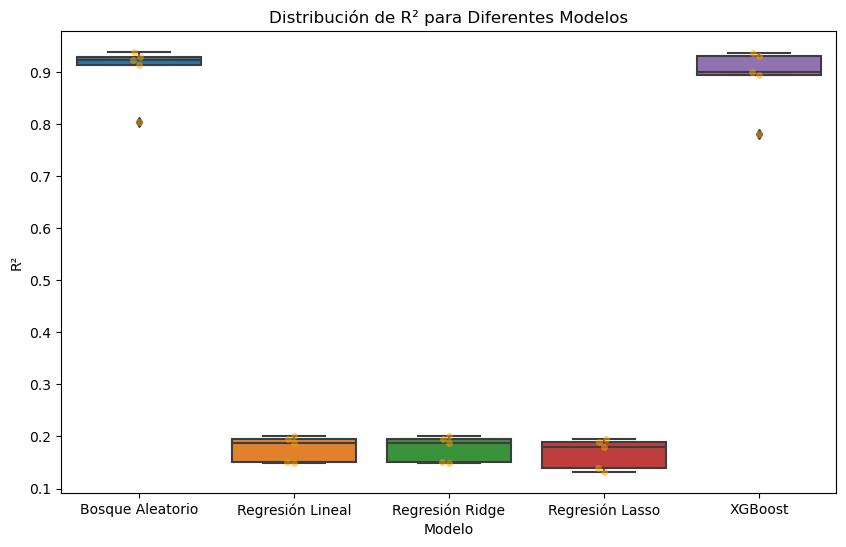

In [69]:
from sklearn.model_selection import cross_val_score

# Asumiendo que 'mejor_rf', 'modelo_rl', 'modelo_ridge', 'modelo_lasso' y 'modelo_xgboost' ya están definidos y entrenados

# Realizar la validación cruzada para cada modelo y almacenar los puntajes R²
r2_scores_rf = cross_val_score(mejor_rf, X, y, cv=5, scoring='r2')
r2_scores_rl = cross_val_score(modelo_rl, X, y, cv=5, scoring='r2')
r2_scores_ridge = cross_val_score(modelo_ridge, X, y, cv=5, scoring='r2')
r2_scores_lasso = cross_val_score(modelo_lasso, X, y, cv=5, scoring='r2')
r2_scores_xgb = cross_val_score(modelo_xgboost, X, y, cv=5, scoring='r2')

# Crear un DataFrame con los puntajes R² para el boxplot
r2_long_df = pd.DataFrame({
    'Bosque Aleatorio': r2_scores_rf,
    'Regresión Lineal': r2_scores_rl,
    'Regresión Ridge': r2_scores_ridge,
    'Regresión Lasso': r2_scores_lasso,
    'XGBoost': r2_scores_xgb
}).melt(var_name='Modelo', value_name='R²')

# Crear el boxplot con los puntajes R² reales
plt.figure(figsize=(10, 6))
sns.boxplot(data=r2_long_df, x='Modelo', y='R²')

# Añadir puntos individuales con swarmplot
sns.swarmplot(data=r2_long_df, x='Modelo', y='R²', color='orange', alpha=0.5)

# Mostrar el gráfico
plt.title('Distribución de R² para Diferentes Modelos')
plt.xlabel('Modelo')
plt.ylabel('R²')
plt.show()

